<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Moore's_Law_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Loading the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
data = pd.read_csv('moore.csv', header = None).to_numpy()

--2025-07-02 19:04:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-07-02 19:04:11 (36.9 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [9]:
X = data[:,0].reshape(-1, 1) # making an N x D
Y = data[:,1]

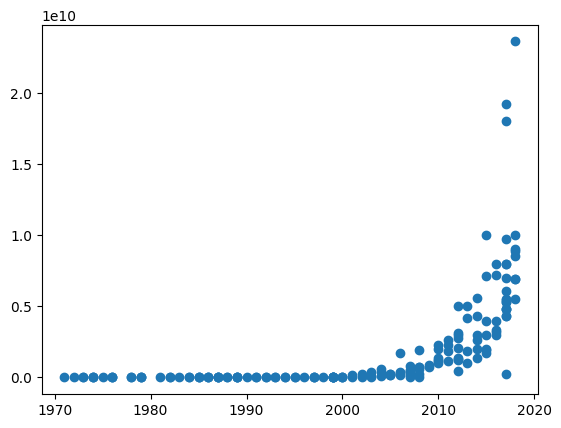

In [10]:
plt.scatter(X, Y)

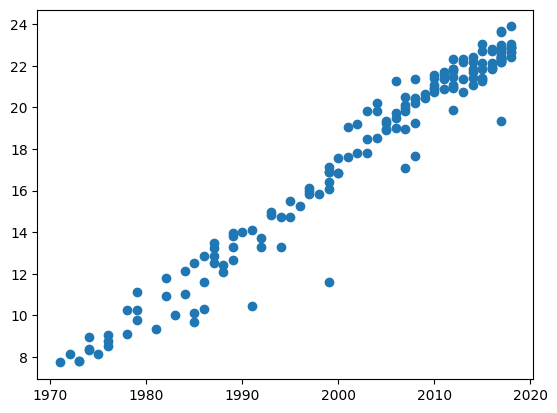

In [11]:
Y = np.log(Y)
plt.scatter(X, Y)

In [14]:
X = X - X.mean()

In [15]:
# Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (1,)),
    tf.keras.layers.Dense(1)
])

In [16]:
# Stochastic Gradient Descent
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9),
              loss = 'mse'
)

In [18]:
# Creating learning rate scheduler
# It basically say start learning fast. But once you get better, slow down and be more careful.
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [19]:
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 483.5135 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 558.5555 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 287.3916 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 271.8657 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 212.3218 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 241.9820 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.5231 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139.1930 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91.7037 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.9272 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.3505 - learning_rate: 0.0010
Epoch 12/20

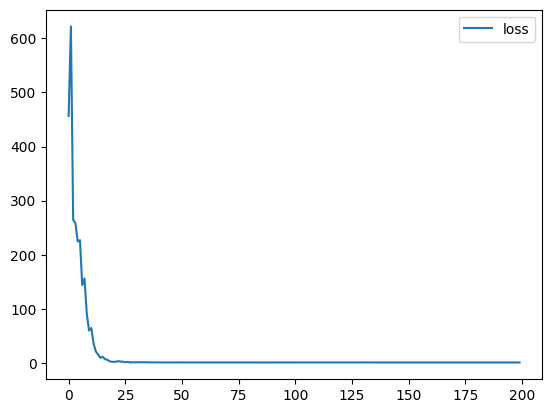

In [20]:
plt.plot(r.history["loss"], label = "loss")
plt.legend()
plt.show()

In [22]:
# y = mx + b
# Note: We use log transformation
model.layers[0].get_weights()

[array([[0.34098876]], dtype=float32), array([17.783531], dtype=float32)]